## Урок 6. Расчёт длительности А/B теста + продвинутые топики

### Задача 1
#### Продакт на главной mail.ru решил протестировать в рекомендательной ленте контента вместо карточек со статьями видеоплеер с короткими видео. Нынешний таймспент на юзера в день в среднем равен 25 минут, а стандартная ошибка (SD) равна 156. Мы предполагаем, что в новой версии таймспент на юзера в день изменится на 10%. Средний трафик 20000 человек в день. Посчитайте сколько дней необходимо держать эксперимент при alpha = 5% и beta = 20% .  

In [1]:
from statsmodels.stats.power import tt_ind_solve_power, zt_ind_solve_power
from statsmodels.stats.proportion import proportion_effectsize
from statsmodels.stats.meta_analysis import effectsize_smd
from typing import Union
import plotly.graph_objects as go
from scipy import stats
from math import asin
import numpy as np

In [2]:
def calc_continuous_effect_size(mean_1: Union[float, int],
                                std_1: Union[float, int],
                                mean_2: Union[float, int],
                                std_2: Union[float, int],
                                nobs_1: int = 10_000,
                                nobs_2: int = 10_000):
    
    es_formula = (mean_1 - mean_2) / ((std_1**2 + std_2**2) / 2) ** 0.5
    es_import = effectsize_smd(mean_1, std_1, nobs_1, mean_2, std_2, nobs_2)[0]
    
    return es_formula, es_import 

In [3]:
def calc_sample_size_continuous(effect_size: float,
                                alpha: float = .05,
                                beta: float = .2,
                                ratio: Union[float, int] = 1):
    
    n = tt_ind_solve_power(effect_size=effect_size,
                           alpha=alpha,
                           power=(1 - beta),
                           ratio=ratio,
                  )
    return int(n * 2)

По условию таймспент 25 мин, если таймспент на юзера в день изменится на 10%, => новый таймспент 27,5 мин.
Стандартная ошибка (SD) равна 156.

In [4]:
mu_control, mu_test = 25, 27.5
std_control, std_test = 156, 156

calc_continuous_effect_size(mean_1=mu_control, std_1=std_control, mean_2=mu_test, std_2=std_test)

(-0.016025641025641024, -0.016025039996486783)

In [5]:
effect_size = calc_continuous_effect_size(mean_1=mu_control, std_1=std_control, mean_2=mu_test, std_2=std_test)[1]
selection = calc_sample_size_continuous(effect_size=effect_size, alpha=.05, beta=.2)

print(f"Общий размер выборки {selection} человек.")

Общий размер выборки 122257 человек.


По условию средний трафик 20000 человек в день.

In [6]:
days = selection/20000

print(f"Необходимо провести эксперимент в течение {days} дней")

Необходимо провести эксперимент в течение 6.11285 дней


Данные 6,11285 дней округляем в большую сторону => ~ 7 дней.

**Результат: ~ 7 дней необходимо держать эксперимент, если мы его реализуем на всех 122 257 пользователях, при alpha = 5% и beta = 20%.**

### Задача 2

#### Наша продуктовая команда в ecommerce магазине планирует запустить тест, направленный на ускорение загрузки сайта. Одна из основных метрик bounce rate в GA = 40%. Мы предполагаем, что при оптимизации сайта она изменится минимум на 20%.Средний трафик 4000 человек в день. Посчитайте сколько нам нужно дней держать эксперимент при alpha = 5% и beta = 20%

In [7]:
from statsmodels.stats.power import tt_ind_solve_power, zt_ind_solve_power
from statsmodels.stats.proportion import proportion_effectsize
from statsmodels.stats.meta_analysis import effectsize_smd
from typing import Union
import plotly.graph_objects as go
from scipy import stats
from math import asin
import numpy as np

In [8]:
def calc_propotion_effect_size(conv_1: int, nobs_1: int, conv_2: int, nobs_2: int):
    prob_1, prob_2 = conv_1 / nobs_1, conv_2 / nobs_2
    
    es_formula = 2  * asin(np.sqrt(prob_1)) - 2 * asin(np.sqrt(prob_2))
    es_import = proportion_effectsize(prob_1, prob_2)
    
    return es_formula, es_import

In [9]:
def calc_sample_size_proportion(effect_size: float,
                                alpha: float = .05,
                                beta: float = .2,
                                ratio: Union[float, int] = 1):
    
    n = zt_ind_solve_power(effect_size=effect_size,
                           alpha=alpha,
                           power=(1 - beta),
                           ratio=ratio,
                  )
    return int(n * 2)

Метрика bounce rate в GA = 40%.  
При оптимизации сайта она изменится минимум на 20% от текущего показателя.  
40% х 0,2 = 8%  
40% - 8% = 32%  
H0=40% # bounce rate в GA  
H1=32% # bounce rate в GA  

Найдем размер выборки для каждой гипотезы, при помощи калькулятора https://www.evanmiller.org/ab-testing/sample-size.html

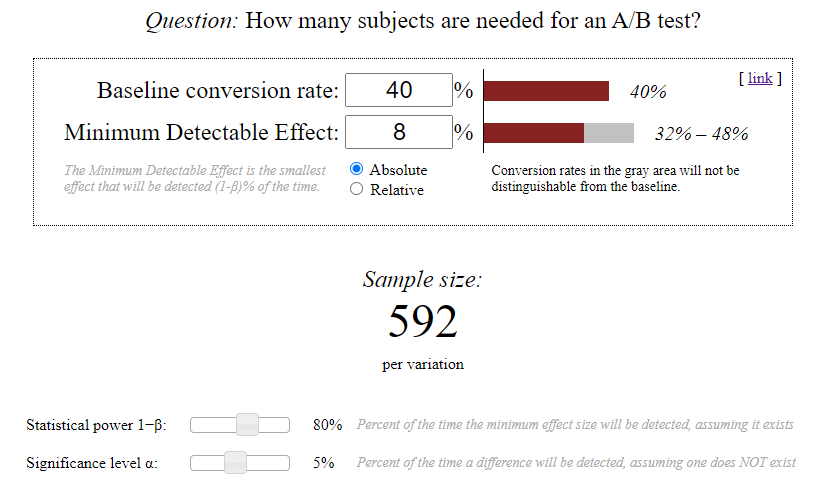

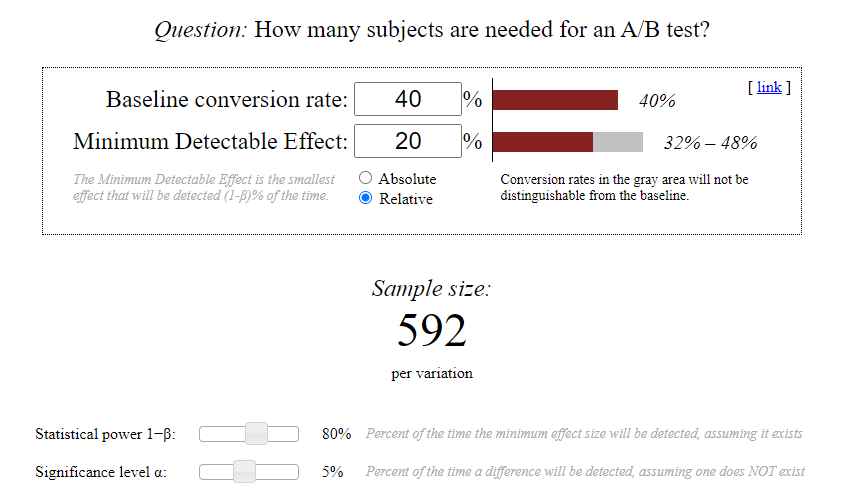

Размер минимально необходимой выборки 592 человека на каждую гипотезу.

In [10]:
conv_1, conv_2 = 40, 32
nobs_1, nobs_2 = 592, 592
prob_1, prob_2 = conv_1 / nobs_1, conv_2 / nobs_2
print(prob_1, prob_2)
calc_propotion_effect_size(conv_1=conv_1, nobs_1=nobs_1, conv_2=conv_2, nobs_2=nobs_2)

0.06756756756756757 0.05405405405405406


(0.05663024817640083, 0.05663024817640083)

In [11]:
effect_size = calc_propotion_effect_size(conv_1=conv_1, nobs_1=nobs_1, conv_2=conv_2, nobs_2=nobs_2)[0]
selection = calc_sample_size_proportion(effect_size=effect_size, alpha=.05, beta=.2)

print(f"Общий размер выборки {selection} человек.")

Общий размер выборки 9789 человек.


По условию средний трафик 4000 человек в день.

In [12]:
days = selection/4000

print(f"Необходимо провести эксперимент в течение {days} дней")

Необходимо провести эксперимент в течение 2.44725 дней


Данные 2,44725 дней округляем в большую сторону => ~ 3 дня.

**Результат: ~ 3 дня необходимо держать эксперимент, если мы его реализуем на всех 9 789 пользователях, при alpha = 5% и beta = 20%.**